In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("seaborn-whitegrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_32/1759593133.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Train set

In [3]:
def make_df(directory):
    df = pd.read_csv(directory)
    df = pd.DataFrame(df)
    return df

In [4]:
pd.set_option('display.max_rows', 4)

train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_train = pd.DataFrame(train)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


MSSubClass: Identifies the type of dwelling involved in the sale.

MSZoning: Identifies the general zoning classification of the sale.

LotFrontage: Linear feet of street connected to property.

LotArea: Lot size in square feet

Street: Type of road access to property

Alley: Type of alley access to property

LotShape: General shape of property

In [5]:
nan_counts = df_train.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
df_train.shape

(1460, 81)

In [7]:
pd.set_option('display.max_rows', None)
print(df_train.dtypes)
pd.set_option('display.max_rows', 6)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
df_train_filt = df_train.dropna(axis=1)

nan_counts = df_train_filt.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [9]:
df_train_filt.shape

(1460, 62)

In [10]:
X = df_train_filt.copy()
y = X.pop("SalePrice")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [11]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

minfo_gen = mutual_info_classif(X, y.values.ravel())
binfo_gen = mutual_info_regression(X, y)

In [12]:
minfo = minfo_gen
binfo = binfo_gen

In [13]:
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature}, MI: {binfo[i]}")

Feature: Id, MI: 0.0
Feature: MSSubClass, MI: 0.0605704239793714
Feature: MSZoning, MI: 0.12236330277982677
Feature: LotArea, MI: 0.09106753227546349
Feature: Street, MI: 0.0
Feature: LotShape, MI: 0.09187315194584356
Feature: LandContour, MI: 0.020450117877140572
Feature: Utilities, MI: 0.007350089984851094
Feature: LotConfig, MI: 0.024649536262458138
Feature: LandSlope, MI: 0.005890125451235351
Feature: Neighborhood, MI: 0.11954287959106269
Feature: Condition1, MI: 0.016249005969998453
Feature: Condition2, MI: 0.0017011701764171328
Feature: BldgType, MI: 0.026620295072731226
Feature: HouseStyle, MI: 0.05084815814840438
Feature: OverallQual, MI: 0.5190933007495349
Feature: OverallCond, MI: 0.1174702461460333
Feature: YearBuilt, MI: 0.25410299684403004
Feature: YearRemodAdd, MI: 0.1976482262938486
Feature: RoofStyle, MI: 0.01249337901009362
Feature: RoofMatl, MI: 0.0
Feature: Exterior1st, MI: 0.015158958628609609
Feature: Exterior2nd, MI: 0.07635661281978212
Feature: ExterQual, MI: 0.3

In [14]:
binfo_df = pd.DataFrame(binfo)
binfo_df.rename(columns = {0:'MI'}, inplace = True)
binfo_df['Features'] = X.columns

In [15]:
minfo_df = pd.DataFrame(minfo)
minfo_df.rename(columns = {0:'MI'}, inplace = True)
minfo_df['Features'] = X.columns

In [16]:
binfo_df

,MI,Features
0,0.000000,Id
1,0.060570,MSSubClass
2,0.122363,MSZoning
...,...,...
58,0.022291,YrSold
59,0.082519,SaleType
60,0.074176,SaleCondition


In [17]:
minfo_df

,MI,Features
0,0.134138,Id
1,0.562766,MSSubClass
2,0.140167,MSZoning
...,...,...
58,0.350073,YrSold
59,0.033080,SaleType
60,0.000000,SaleCondition


In [18]:
binfo_df = binfo_df.sort_values(by ='MI', ascending = False)
binfo_df

,MI,Features
15,0.519093,OverallQual
36,0.379951,GrLivArea
47,0.377621,GarageCars
...,...,...
57,0.000000,MoSold
4,0.000000,Street
0,0.000000,Id


In [19]:
minfo_df = minfo_df.sort_values(by='MI', ascending=False)
minfo_df

,MI,Features
42,3.664425,KitchenAbvGr
47,2.186981,GarageCars
23,1.859187,ExterQual
...,...,...
7,0.000000,Utilities
4,0.000000,Street
60,0.000000,SaleCondition


In [20]:
def plot_mi(df, sort_name, y_name, title):
    df = df.sort_values(by=sort_name, ascending=True)
    width = np.arange(len(df))
    tick = list(df[y_name])
    plt.barh(width, df[sort_name])
    plt.yticks(width, tick)
    plt.title(title)
    plt.show()

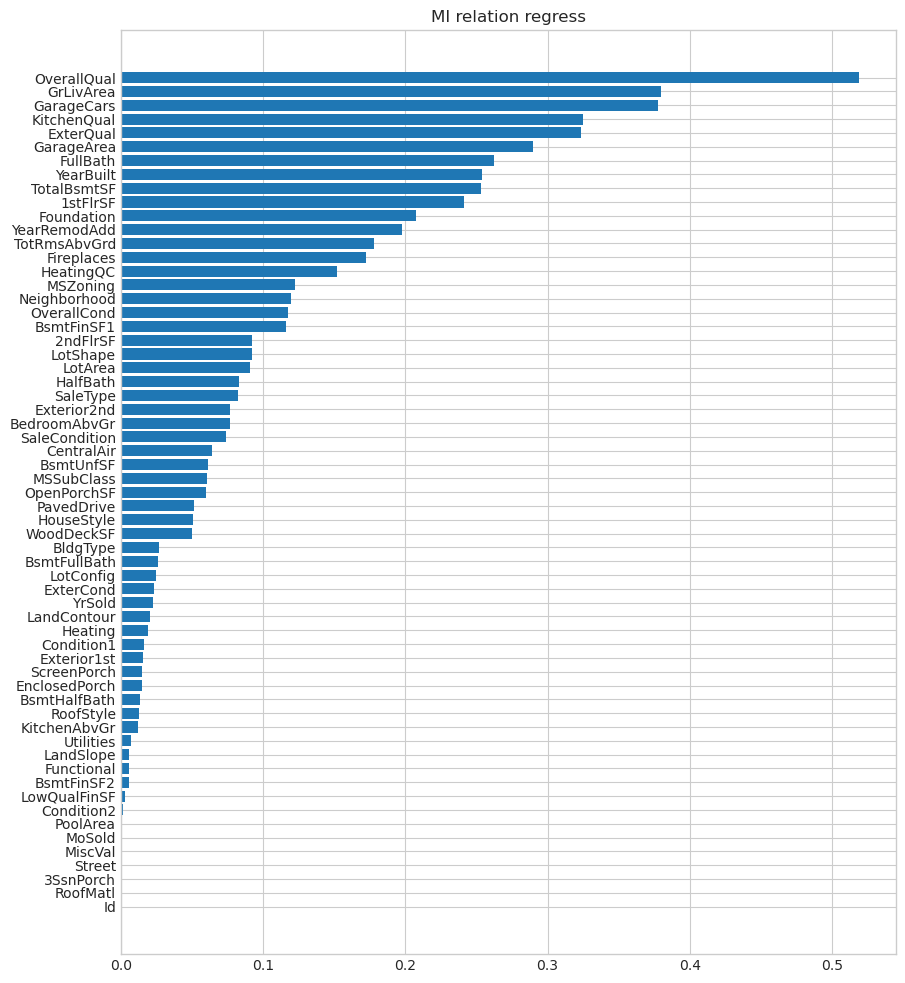

In [21]:
plt.figure(dpi=100, figsize=(10, 12))
plot_mi(binfo_df, 'MI', 'Features', "MI relation regress")

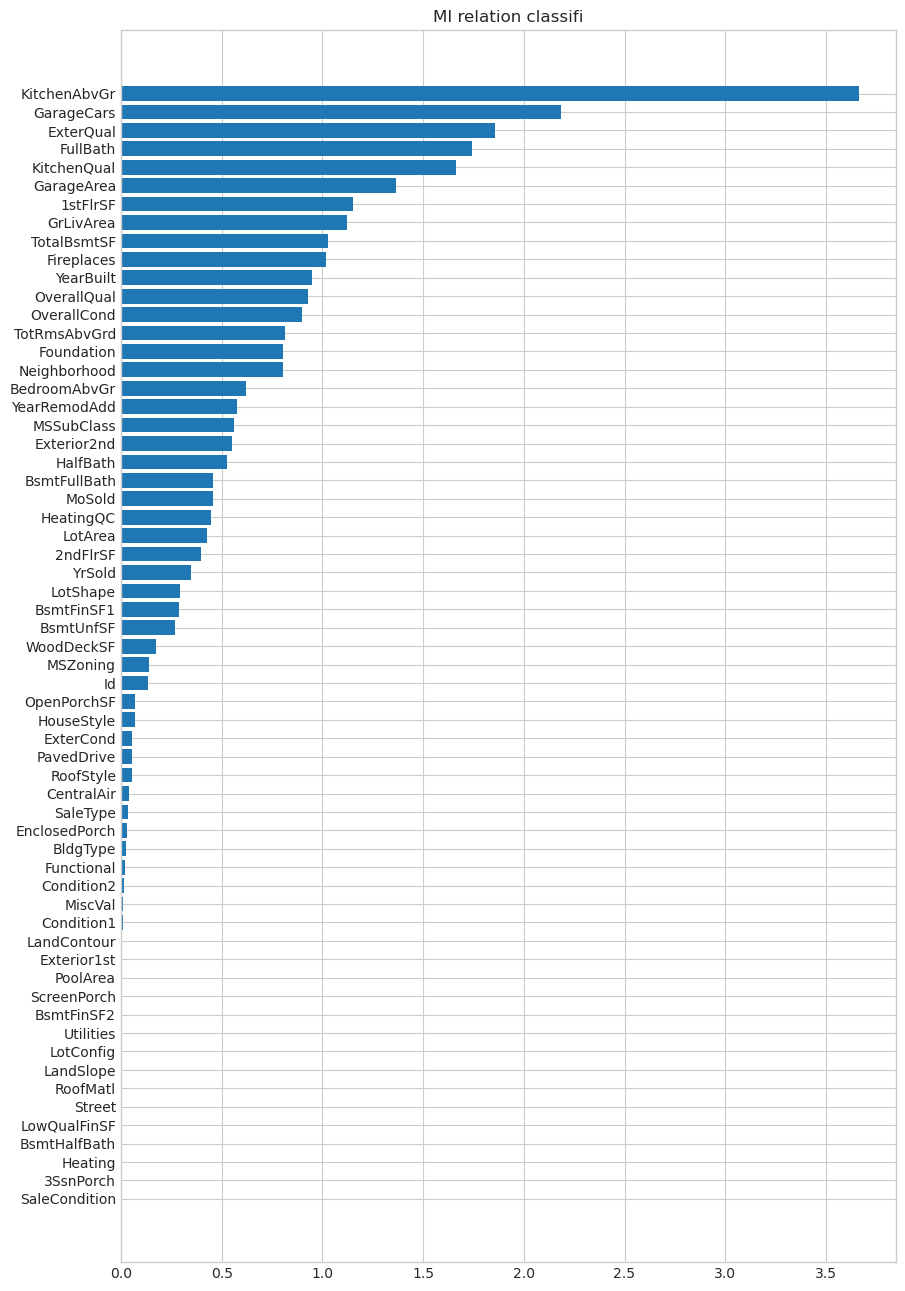

In [22]:
plt.figure(dpi=100, figsize=(10, 16))
plot_mi(minfo_df, 'MI', 'Features', "MI relation classifi")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


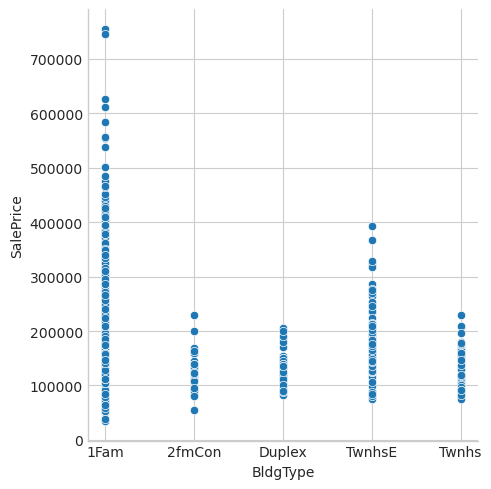

In [23]:
sns.relplot(x='BldgType', y='SalePrice', data=df_train_filt);

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


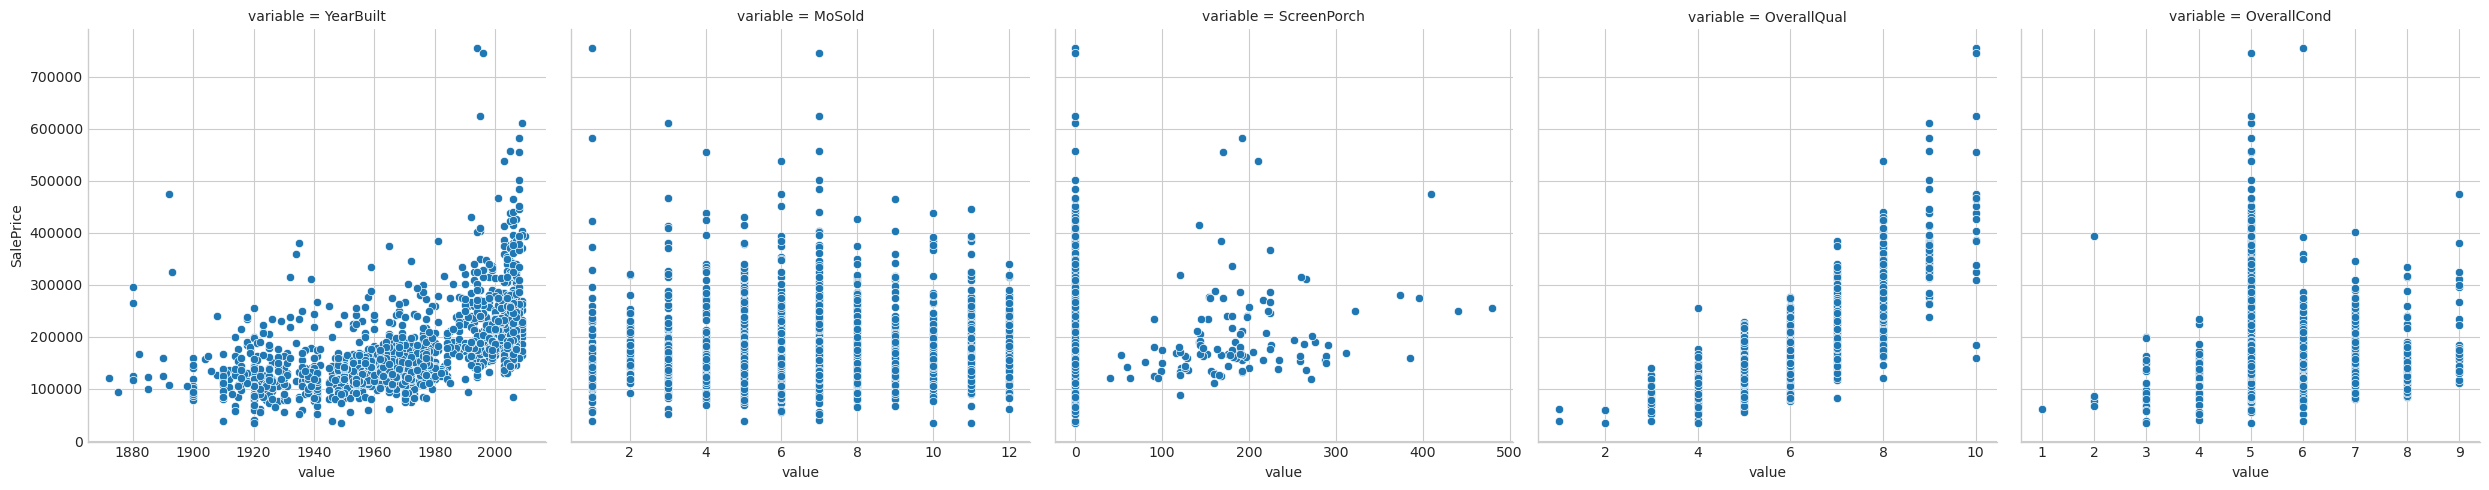

In [24]:
features = ["YearBuilt", "MoSold", "ScreenPorch", "OverallQual", "OverallCond"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df_train.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [67]:
def corre_heatmap(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(20, 16))
    sns.heatmap(correlation_matrix, annot=False, cmap='RdBu')
    plt.show()

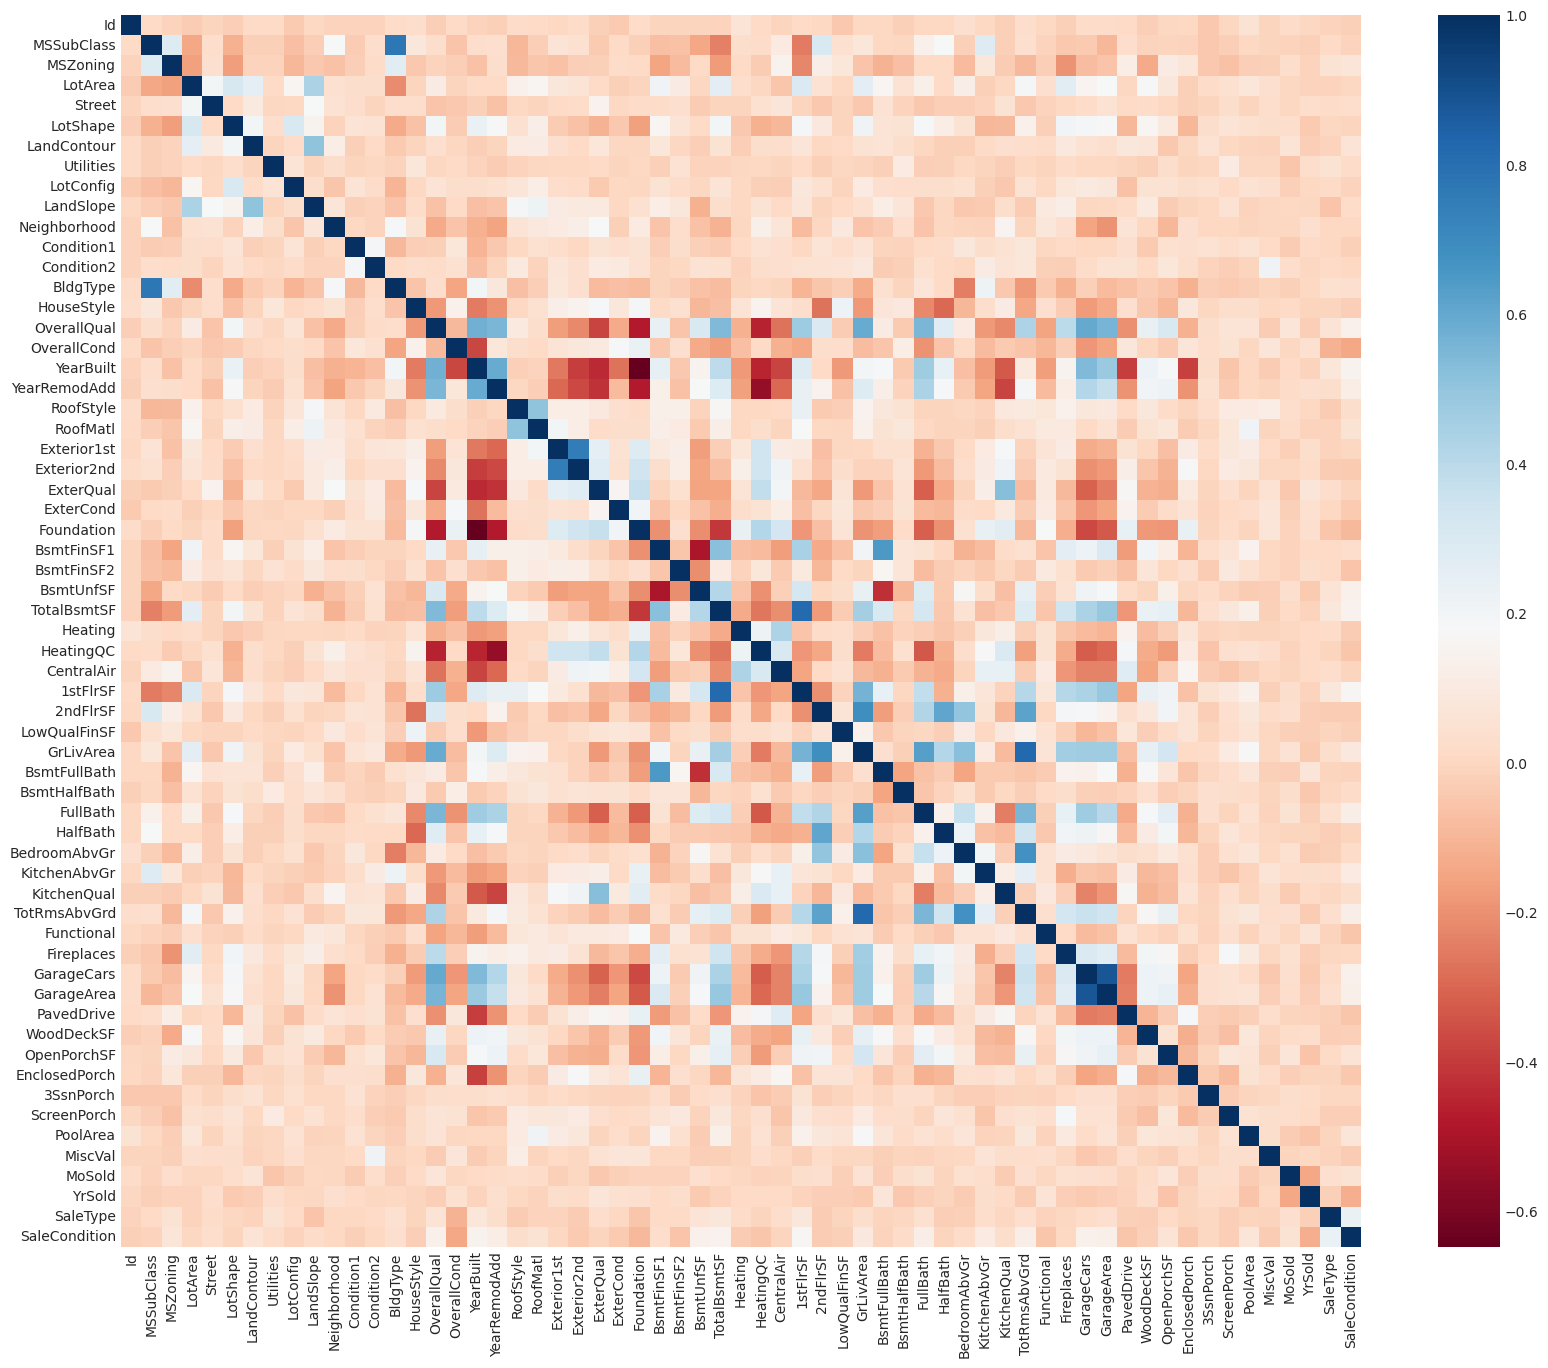

In [68]:
corre_heatmap(X)

# Test set

In [44]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df_test = pd.DataFrame(test)

nan_counts = df_test.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [45]:
df_test_filt = df_test.dropna(axis=1)

In [46]:
nan_counts = df_test_filt.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id               0
MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
dtype: int64


In [62]:
if df_train_selected_test.columns.equals(df_train_selected.columns):
    print("Both DataFrames have the same columns.")
else:
    print("The columns in the two DataFrames are different.")

Both DataFrames have the same columns.


# Feature selection 

# df_train

Train a RandomForestReg and NeuralNet with...

Original feature selections.

Selected features.



## Removed features
'Id',
     'Street',
     'Utilities',
     'Condition1',
     'Condition2',
     'HouseStyle',
     'BsmtFinSF2',
     'LowQualFinSF',
     'BsmtHalfBath',
     'Functional',
     'EnclosedPorch',
     '3SsnPorch',
     'ScreenPorch',
     'PoolArea',
     'YrSold',
     'MiscVal',
     'MoSold',
     'SaleType',
     'SaleType',
     'SaleCondition'

In [59]:
def df_selected(df, filt):
    for i in filt:
        if i in df.columns:
            df = df.drop(i, axis=1)
        else:
            continue
    return df

In [60]:
exclude = ['Id',
     'Street',
     'Utilities',
     'Condition1',
     'Condition2',
     'HouseStyle',
     'BsmtFinSF2',
     'LowQualFinSF',
     'BsmtHalfBath',
     'Functional',
     'EnclosedPorch',
     '3SsnPorch',
     'ScreenPorch',
     'PoolArea',
     'YrSold',
     'MiscVal',
     'MoSold',
     'SaleType',
     'SaleType',
     'SaleCondition']

In [61]:
df_train_selected = df_selected(df_train_filt, exclude)

/tmp/ipykernel_32/2338320743.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


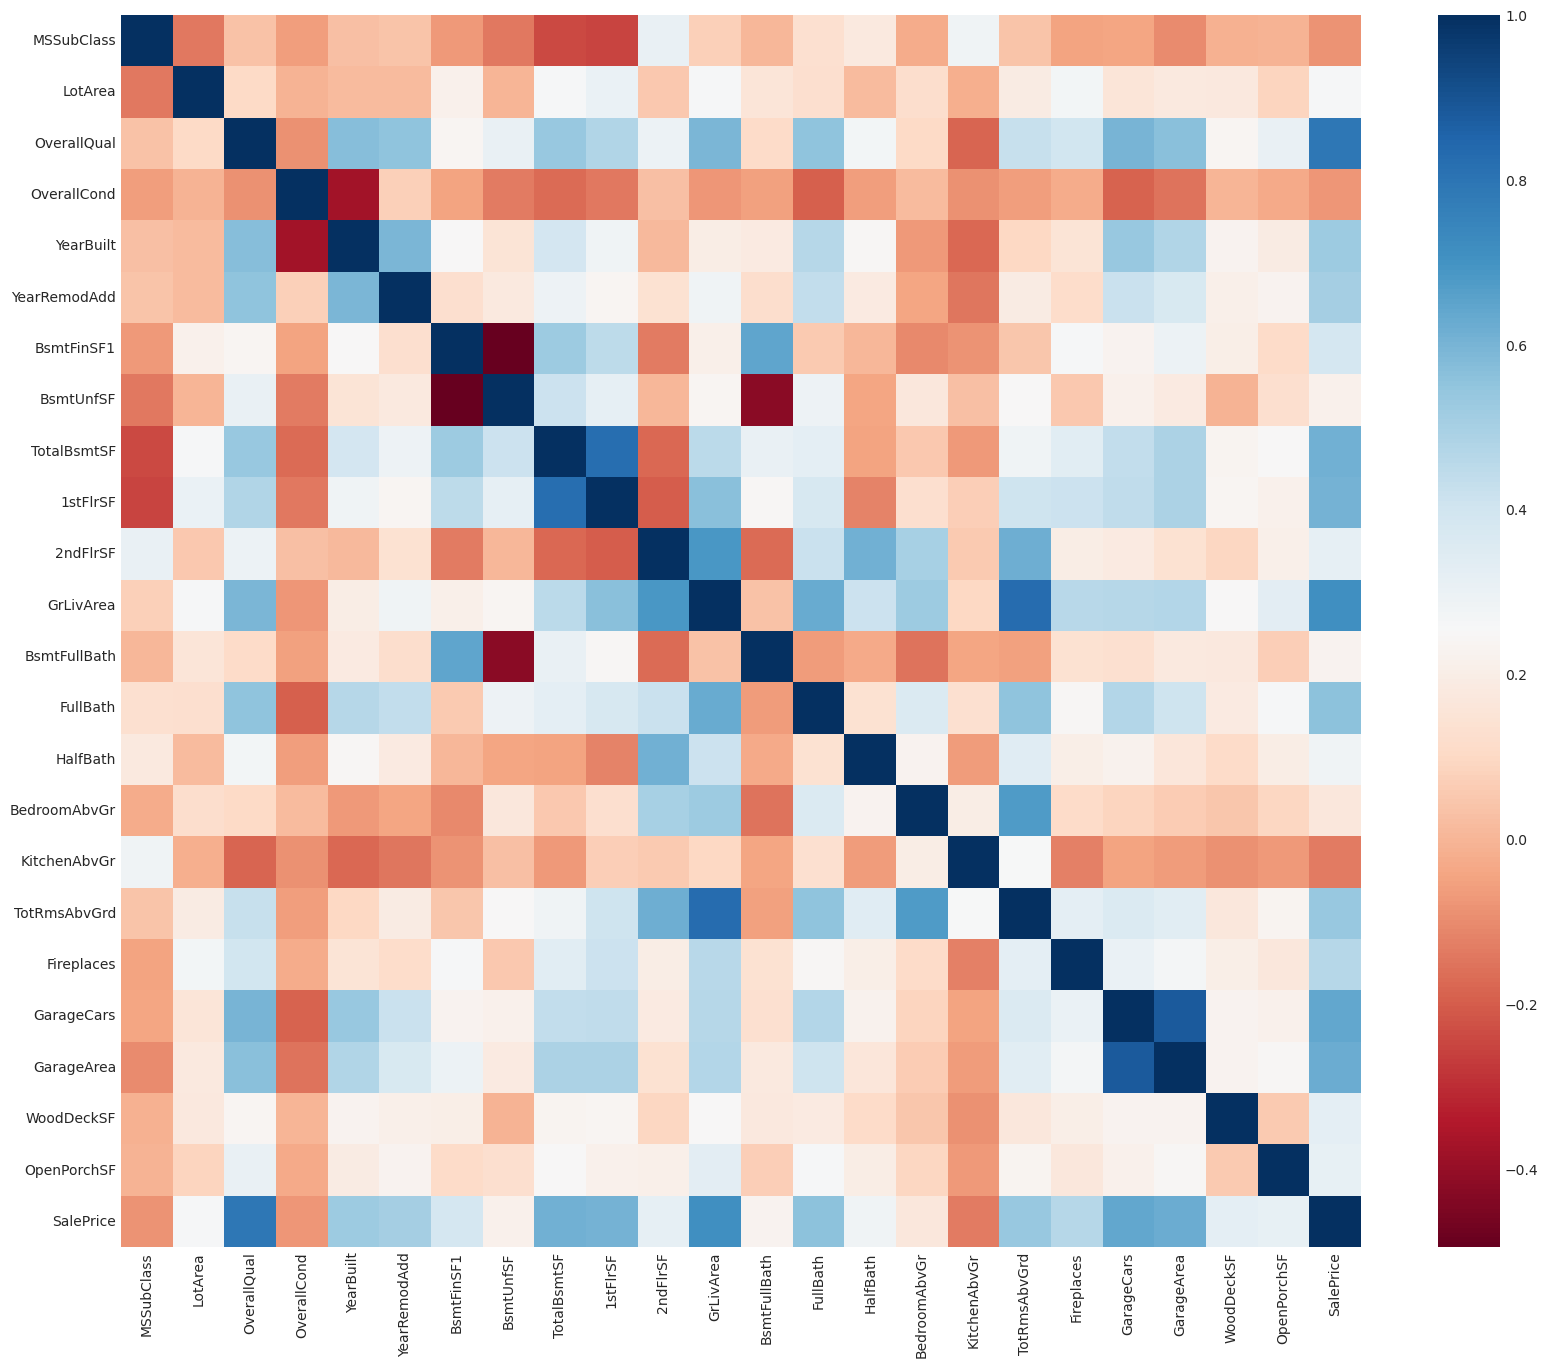

In [69]:
corre_heatmap(df_train_selected)

In [72]:
df_test_selected = df_selected(df_test_filt, exclude)

/tmp/ipykernel_32/2338320743.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


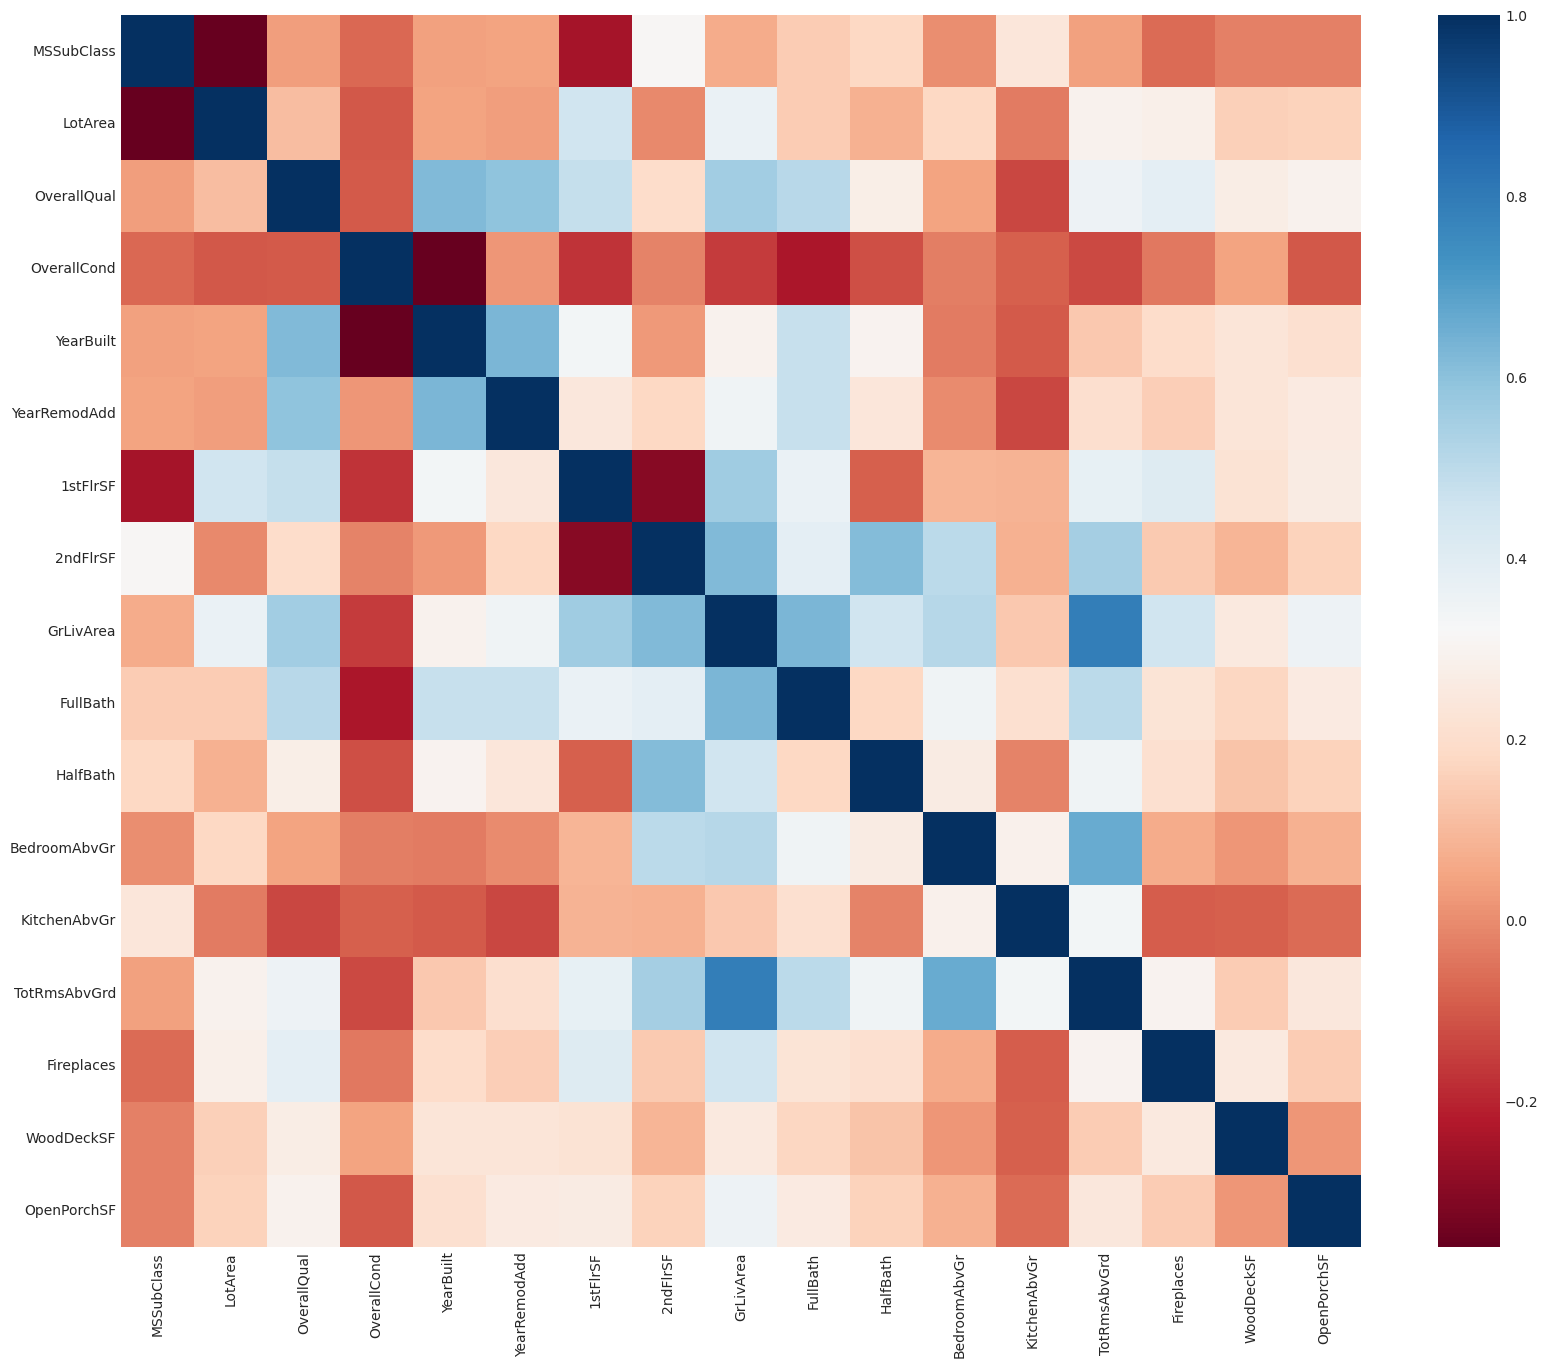

In [73]:
corre_heatmap(df_test_selected)

In [74]:
columns_only_in_df_train_selected = df_train_selected.columns.difference(df_test_selected.columns)
print("Columns only in df_train_selected:")
print(columns_only_in_df_train_selected)

# Find the columns that are in df2 but not in df1
columns_only_in_df_test_selected = df_test_selected.columns.difference(df_train_selected.columns)
print("\nColumns only in df_test_selected:")
print(columns_only_in_df_test_selected)

# Compare the common columns for differences
common_columns = df_train_selected.columns.intersection(df_test_selected.columns)

Columns only in df_train_selected:
Index(['BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'Exterior1st', 'Exterior2nd',
       'GarageArea', 'GarageCars', 'KitchenQual', 'MSZoning', 'SalePrice',
       'TotalBsmtSF'],
      dtype='object')

Columns only in df_test_selected:
Index(['Electrical'], dtype='object')


In [33]:
df_train_filt

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [41]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train = df_train_selected.drop(['SalePrice'], axis=1)
y_train = df_train_selected['SalePrice']
X_test = df_test_selected.drop(['SalePrice'], axis=1)
y_test = df_test_selected['SalePrice']

In [40]:
y_train.nunique()

663

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)